Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Nhat Pham"
COLLABORATORS = ""

---

# CS110 Pre-class Work 13.2

## Question 1.

The Python class `Activity` is defined below. Each activity is characterized by its name, its start time and its finish time. Your task is to complete the `greedy_activity_selector` function, which takes a list of activities sorted by their finish times as an argument.

In [12]:

class Activity:
    def __init__(self, name, start, finish):
        self.name = name
        self.start = start
        self.finish = finish
    
def greedy_activity_selector(A):
    """
    Implements an iterative greedy algorithm to solve the activity-selection 
    problem (making use of NO recursive calls). See GREEDY-ACTIVITY-SELECTOR 
    in Cormen et al., p.421
    
    Inputs:
    - A: list of activities, instances of Activity, already sorted by finish 
    times
    
    Outputs:
    - out_list: the longest list possible of mutually compatible activities.
    """
    n = len(A)
    x = [A[0]]
    k = 0
    for m in range(1,n):
        if A[m].start >= A[k].finish:
            x.append(A[m])
            k = m
    return(x)
    raise NotImplementedError()



In [21]:
A = [Activity('3', 0, 1),
     Activity('1', 0, 2),
     Activity('2', 1, 5),
     Activity('4', 5, 6)]
for i in greedy_activity_selector(A):
    print(i.name)


3
2
4


## Question 2. 
Complete the function below.

In [54]:
def recursive_activity_selector(A, k, n):
    """
    Implements a recursive greedy algorithm to solve the activity-selection 
    problem. See RECURSIVE-ACTIVITY-SELECTOR in Cormen et al., p.419. Note 
    that in Cormen et al., the call that solves the entire problem is the call
    with k=0. Because of the 0-indexing scheme in Python, the call that solves 
    the entire problem is with k=-1 (i.e., recursive_activity_selector(A, -1, len(A)))
    
    Inputs:
    - A: list of activities, instances of Activity, already sorted by finish 
    times
    - k: int, defines the subproblem S_k it is to solve (see Cormen et al.) for 
    the definition of the subproblem S_k
    - n: int, the size n of the original problem
    
    Outputs:
    - out_list: the longest list possible of mutually compatible activities. 
    """
    m = k+1
#     if m == 0:
#         result = [A[m]]
#         m+=1
#         k = 0
#     else: 
#         result = []

    if m == 0:
        result = [A[m]]
        result.extend(recursive_activity_selector(A, m, n))
    else:    
        while m <= n-1 and A[m].start < A[k].finish:
            m +=1
        if m <= n-1:
            result = [A[m]]
            result.extend(recursive_activity_selector(A, m, n))
        else: 
            result = []
    return result
#     raise NotImplementedError()
    
A = [Activity('3', 0, 1),
     Activity('1', 0, 2),
     Activity('2', 1, 5),
     Activity('4', 5, 6)]

# recursive_activ/ity_selector(A, -1, 4)
for i in recursive_activity_selector(A, -1, 4):
    print(i.name)



3
2
4


In [50]:
a = []
a.extend([1])

## Question 3. 
Compare the running time of `greedy_activity_selector` and `recursive_activity_selector` on different lengths of a random activity list. Do this by producing a plot, where the x axis is the length of the activity list (`list(range(1,1000,10))`) and the y axis is the running time. Note that:
1. Don't forget to average your results over 100 iterations for each length of the activity list.
2. The two lines for `greedy_activity_selector` and `recursive_activity_selector` should be present in the same plot (with different colors), not two separate plots, for easy comparison. 
3. To generate an random activity list of a certain length, use the function `activity_list_gen` below. 

In [29]:
import random
def activity_list_gen(n):
    finish_times = random.sample(range(n*3), n)
    finish_times.sort()
    
    start_times = []
    for ftime in finish_times:
        offset = random.randint(1,5)
        start_times.append(max(ftime-offset, 0))
    
    out_list = []
    for i in range(n):
        out_list.append(Activity(str(i), start_times[i], finish_times[i]))
    
    return out_list

In [59]:
activity_list_gen(10)

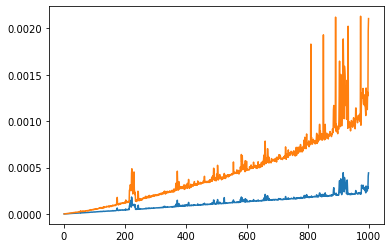

In [71]:
act = []
for i in range(1,1000):
    act.append(activity_list_gen(i))
import time
greedy = []
recursion = []
for length in act:
    temp_greedy = []
    temp_recursion = []
    for _ in range(100):
        start = time.time()
        greedy_activity_selector(length)
        end = time.time()
        temp_greedy.append(end-start)
        
        start = time.time()
        recursive_activity_selector(length, -1, len(length))
        end = time.time()
        temp_recursion.append(end-start)
    greedy.append(sum(temp_greedy)/100)
    recursion.append(sum(temp_recursion)/100)
import matplotlib.pyplot as plt
plt.plot(list(range(1,1000)),greedy)
plt.plot(list(range(1,1000)),recursion)
       

In [ ]:

raise NotImplementedError()

## Question 4. 
Explain the results in question 3.

YOUR ANSWER HERE

## [Optional] Question 5. 
Overload the operator "<" for a comparison between two instances of the class Activity so that A.sort() will sort A, a list of activities, by their finish times.

**This might be very helpful for your final project, so please try this exercise and reach out to the TAs if you'd like to further discuss Overloading in Python**

In [ ]:
import copy
class Activity:
    def __init__(self, name, start, finish):
        self.name = name
        self.start = start
        self.finish = finish
    
    def __lt__(self, other):
        # YOUR CODE HERE
        raise NotImplementedError()

# Testing code

A = [Activity('1', 0, 2),
     Activity('2', 1, 5),
     Activity('3', 0, 1),
     Activity('4', 5, 6)]

A.sort()

finish_time_list = []

for act in A:
    finish_time_list.append(act.finish)

B = copy.deepcopy(finish_time_list)
B.sort()
B == finish_time_list